In [1]:
# Import packages pulp and pandas
import pandas as pd
import numpy as np
from pulp import *
import matplotlib.pyplot as plt
dat = '5-16'

In [2]:
file1 = (r'C:\Users\zacha\Documents\NBA_PLAYER_BOX_SCORES_2021.xlsx')
data = pd.read_excel(file1, sheet_name = 0, header=0)
data.describe()

,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,...,TOV,PF,+/-,FPTS,FPTS/MIN,PTS_DIFF,OPP_DEFRTG,OPP_REB%,OPP_TOV%,OPP_PACE
count,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,...,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22449.000000,22456.000000,22456.000000,22456.000000,22456.00000
mean,22.693623,10.529035,3.870369,8.305887,1.193757,3.254498,1.594540,2.050143,0.923495,3.239223,...,1.243498,1.814214,-0.000891,21.276011,0.886601,0.175362,111.487384,50.013609,13.888783,99.69756
std,10.511594,8.652074,3.214721,5.931299,1.500419,3.026761,2.234617,2.691348,1.317078,2.736013,...,1.397114,1.438487,11.414117,14.498026,0.445033,9.357975,2.575925,1.633672,1.072825,1.84060
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-50.000000,-3.000000,-1.000000,-48.554717,106.000000,47.200000,11.500000,96.46000
25%,15.000000,4.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,-7.000000,10.000000,0.603671,-6.100000,110.000000,48.900000,13.200000,98.27000
50%,24.000000,9.000000,3.000000,7.000000,1.000000,3.000000,1.000000,1.000000,0.000000,3.000000,...,1.000000,2.000000,0.000000,19.400000,0.869631,-0.652273,111.700000,49.500000,14.000000,99.36000
75%,31.000000,15.000000,6.000000,12.000000,2.000000,5.000000,2.000000,3.000000,1.000000,5.000000,...,2.000000,3.000000,7.000000,30.225000,1.150000,5.883607,112.600000,51.400000,14.600000,100.81000
max,51.000000,62.000000,21.000000,37.000000,11.000000,21.000000,19.000000,24.000000,12.000000,20.000000,...,10.000000,6.000000,54.000000,93.900000,5.500000,52.137288,117.900000,52.900000,15.600000,104.74000


In [3]:
data

,PLAYER,TEAM,MATCHUP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,...,H/A,OPP,FPTS/MIN,PTS_DIFF,POSITION,OPP_POS,OPP_DEFRTG,OPP_REB%,OPP_TOV%,OPP_PACE
0,Aaron Gordon,ORL,ORL vs. MIA,2020-12-23,W,26,20,8,11,72.7,...,Home,MIA,1.476923,10.707143,PF,MIA-PF,109.4,48.9,14.8,97.17
1,Aaron Gordon,ORL,ORL @ WAS,2020-12-26,W,30,15,6,12,50,...,Away,WAS,1.010000,2.607143,PF,WAS-PF,112.1,49.0,14.1,104.74
2,Aaron Gordon,ORL,ORL @ WAS,2020-12-27,W,20,4,1,4,25,...,Away,WAS,0.560000,-16.492857,PF,WAS-PF,112.1,49.0,14.1,104.74
3,Aaron Gordon,ORL,ORL @ OKC,2020-12-29,W,22,12,5,10,50,...,Away,OKC,1.090909,-3.692857,PF,OKC-PF,112.6,49.3,15.6,101.18
4,Aaron Gordon,ORL,ORL vs. PHI,2020-12-31,L,21,6,1,8,12.5,...,Home,PHI,0.719048,-12.592857,PF,PHI-PF,107.0,51.8,14.6,100.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22451,Zion Williamson,NOP,NOP @ DEN,2021-04-28,L,31,21,8,17,47.1,...,Away,DEN,0.851613,-16.603509,PF,DEN-PF,111.7,52.4,13.8,97.35
22452,Zion Williamson,NOP,NOP @ OKC,2021-04-29,W,34,27,12,24,50,...,Away,OKC,1.429412,5.116667,PF,OKC-PF,112.6,49.3,15.6,101.18
22453,Zion Williamson,NOP,NOP @ MIN,2021-05-01,W,42,37,14,17,82.4,...,Away,MIN,1.400000,15.316667,PF,MIN-PF,115.2,48.0,14.0,101.88
22454,Zion Williamson,NOP,NOP vs. GSW,2021-05-03,L,37,32,12,24,50,...,Home,GSW,1.218919,1.616667,PF,GSW-PF,109.8,47.6,14.5,103.06


In [4]:
data['EMA2'] = ((data.groupby(['PLAYER'])['FPTS'].transform(lambda x: x.ewm(span=2).mean())))

In [5]:
opp_pos = data.groupby(['OPP','POSITION','OPP_POS'])['PTS_DIFF','FPTS', 'FPTS/MIN'].mean().reset_index()
opp_c = opp_pos[opp_pos['POSITION']=='C'].reset_index(drop=True)
opp_pf = opp_pos[opp_pos['POSITION']=='PF'].reset_index(drop=True)
opp_sf = opp_pos[opp_pos['POSITION']=='SF'].reset_index(drop=True)
opp_sg = opp_pos[opp_pos['POSITION']=='SG'].reset_index(drop=True)
opp_pg = opp_pos[opp_pos['POSITION']=='PG'].reset_index(drop=True)

In [6]:
def opp_process(opp):
    fpts_mu = opp['FPTS'].mean()
    diff_mu = opp['PTS_DIFF'].mean()
    fpts_min_mu = opp['FPTS/MIN'].mean()
    
    opp['FPTS_AGST_AVG'] = ''
    opp['DIFF_AGST_AVG'] = ''
    opp['FPTS_MIN_AGST_AVG'] = ''
    
    for i in range(len(opp_pg)):
        fpt = opp_pg.iloc[i]['FPTS'] / fpts_mu
        diff = opp_pg.iloc[i]['PTS_DIFF'] - diff_mu
        fpts_min = opp_pg.iloc[i]['FPTS/MIN'] / fpts_min_mu
        opp.at[i, 'FPTS_AGST_AVG'] = fpt
        opp.at[i, 'DIFF_AGST_AVG'] = diff
        opp.at[i, 'FPTS_MIN_AGST_AVG'] = fpts_min
    return opp

In [7]:
opp_pg = opp_process(opp_pg)
opp_sg = opp_process(opp_sg)
opp_sf = opp_process(opp_sf)
opp_pf = opp_process(opp_pf)
opp_c = opp_process(opp_c)

In [8]:
opps = [opp_pg, opp_sg, opp_sf, opp_pf, opp_c]
opponents = pd.concat(opps).reset_index(drop=True)
opponents = opponents[['OPP','POSITION','OPP_POS','FPTS_AGST_AVG','PTS_DIFF','FPTS_MIN_AGST_AVG']]
opponents

,OPP,POSITION,OPP_POS,FPTS_AGST_AVG,PTS_DIFF,FPTS_MIN_AGST_AVG
0,ATL,PG,ATL-PG,1.09157,1.950136,1.05003
1,BKN,PG,BKN-PG,0.9459,-0.573859,0.955284
2,BOS,PG,BOS-PG,0.998046,-1.094502,0.961094
3,CHA,PG,CHA-PG,0.978084,0.487282,1.02274
4,CHI,PG,CHI-PG,0.976069,0.193591,0.995226
...,...,...,...,...,...,...
145,SAC,C,SAC-C,1.06715,2.215453,0.891891
146,SAS,C,SAS-C,1.05981,2.356857,0.933581
147,TOR,C,TOR-C,1.07536,-0.886793,0.882351
148,UTA,C,UTA-C,0.947061,-1.640983,0.805474


In [9]:
player_stats = pd.DataFrame(data.groupby('PLAYER')['FPTS','FPTS/MIN'].mean())

In [10]:
last = pd.DataFrame(data.set_index('PLAYER').groupby(level='PLAYER').agg(['last']).stack())
last = last.reset_index()[['PLAYER','POSITION','TEAM','EMA2']]
l = last.merge(player_stats, how='inner', left_on = 'PLAYER', right_on = 'PLAYER')

In [11]:
opp_lst = (r'C:\Users\zacha\Documents\Opponent List.xlsx')
opponent = pd.read_excel(opp_lst, sheet_name = 0, header=0)
opponent = opponent[['TEAM',dat]].rename(columns={dat:'OPP'})

In [12]:
opponents

,OPP,POSITION,OPP_POS,FPTS_AGST_AVG,PTS_DIFF,FPTS_MIN_AGST_AVG
0,ATL,PG,ATL-PG,1.09157,1.950136,1.05003
1,BKN,PG,BKN-PG,0.9459,-0.573859,0.955284
2,BOS,PG,BOS-PG,0.998046,-1.094502,0.961094
3,CHA,PG,CHA-PG,0.978084,0.487282,1.02274
4,CHI,PG,CHI-PG,0.976069,0.193591,0.995226
...,...,...,...,...,...,...
145,SAC,C,SAC-C,1.06715,2.215453,0.891891
146,SAS,C,SAS-C,1.05981,2.356857,0.933581
147,TOR,C,TOR-C,1.07536,-0.886793,0.882351
148,UTA,C,UTA-C,0.947061,-1.640983,0.805474


In [13]:
oppo = l.merge(opponent, how='inner', left_on = 'TEAM', right_on = 'TEAM')
oppo['OPP_POS'] = oppo['OPP'] + '-' + oppo['POSITION']
pred = oppo.merge(opponents, how = 'inner', left_on='OPP_POS', right_on = 'OPP_POS')
pred = pred.drop(columns=['OPP_y','POSITION_y']).rename(columns={'OPP_x':'OPP','POSITION_x':'POSITION'})

In [14]:
pred

,PLAYER,POSITION,TEAM,EMA2,FPTS,FPTS/MIN,OPP,OPP_POS,FPTS_AGST_AVG,PTS_DIFF,FPTS_MIN_AGST_AVG
0,Aaron Gordon,PF,DEN,27.370015,26.781250,0.933977,POR,POR-PF,1.10064,0.740386,1.00054
1,Bol Bol,PF,DEN,1.210178,4.123333,0.950224,POR,POR-PF,1.10064,0.740386,1.00054
2,JaMychal Green,PF,DEN,17.858159,16.689286,0.888171,POR,POR-PF,1.10064,0.740386,1.00054
3,Michael Porter Jr.,PF,DEN,28.364255,33.269492,1.052223,POR,POR-PF,1.10064,0.740386,1.00054
4,Paul Millsap,PF,DEN,24.446079,20.911111,1.015381,POR,POR-PF,1.10064,0.740386,1.00054
...,...,...,...,...,...,...,...,...,...,...,...
363,Wayne Ellington,SG,DET,10.456246,15.388889,0.660221,MIA,MIA-SG,1.12797,0.145190,1.07761
364,Isaiah Stewart,C,DET,29.737100,21.304478,0.978124,MIA,MIA-C,0.974716,-1.445102,0.835351
365,Jahlil Okafor,C,DET,13.102834,9.148000,0.788500,MIA,MIA-C,0.974716,-1.445102,0.835351
366,Jerami Grant,PF,DET,25.305674,35.240741,1.037545,MIA,MIA-PF,1.01141,-0.943887,0.938921


In [15]:
pred['FPTS_MIN_AGST_AVG'].describe()

count     368.000000
unique     98.000000
top         1.211521
freq       11.000000
Name: FPTS_MIN_AGST_AVG, dtype: float64

In [16]:
pred['PRED'] = ((((pred['EMA2']*0.4) + (pred['FPTS'])*0.6)) + pred['PTS_DIFF'])
pred

,PLAYER,POSITION,TEAM,EMA2,FPTS,FPTS/MIN,OPP,OPP_POS,FPTS_AGST_AVG,PTS_DIFF,FPTS_MIN_AGST_AVG,PRED
0,Aaron Gordon,PF,DEN,27.370015,26.781250,0.933977,POR,POR-PF,1.10064,0.740386,1.00054,27.757142
1,Bol Bol,PF,DEN,1.210178,4.123333,0.950224,POR,POR-PF,1.10064,0.740386,1.00054,3.698457
2,JaMychal Green,PF,DEN,17.858159,16.689286,0.888171,POR,POR-PF,1.10064,0.740386,1.00054,17.897221
3,Michael Porter Jr.,PF,DEN,28.364255,33.269492,1.052223,POR,POR-PF,1.10064,0.740386,1.00054,32.047783
4,Paul Millsap,PF,DEN,24.446079,20.911111,1.015381,POR,POR-PF,1.10064,0.740386,1.00054,23.065485
...,...,...,...,...,...,...,...,...,...,...,...,...
363,Wayne Ellington,SG,DET,10.456246,15.388889,0.660221,MIA,MIA-SG,1.12797,0.145190,1.07761,13.561021
364,Isaiah Stewart,C,DET,29.737100,21.304478,0.978124,MIA,MIA-C,0.974716,-1.445102,0.835351,23.232424
365,Jahlil Okafor,C,DET,13.102834,9.148000,0.788500,MIA,MIA-C,0.974716,-1.445102,0.835351,9.284831
366,Jerami Grant,PF,DET,25.305674,35.240741,1.037545,MIA,MIA-PF,1.01141,-0.943887,0.938921,30.322827


In [17]:
file3 = (r'C:\Users\zacha\Documents\Yahoo_DFS_Cost.xlsx')
cost = pd.read_excel(file3, sheet_name = dat, header=0)
cost = cost[['PLAYER', 'COST']]
pred = pred.merge(cost, how = 'inner', left_on = 'PLAYER', right_on = 'PLAYER')
pred

,PLAYER,POSITION,TEAM,EMA2,FPTS,FPTS/MIN,OPP,OPP_POS,FPTS_AGST_AVG,PTS_DIFF,FPTS_MIN_AGST_AVG,PRED,COST
0,Aaron Gordon,PF,DEN,27.370015,26.781250,0.933977,POR,POR-PF,1.10064,0.740386,1.00054,27.757142,14
1,Bol Bol,PF,DEN,1.210178,4.123333,0.950224,POR,POR-PF,1.10064,0.740386,1.00054,3.698457,10
2,JaMychal Green,PF,DEN,17.858159,16.689286,0.888171,POR,POR-PF,1.10064,0.740386,1.00054,17.897221,10
3,Michael Porter Jr.,PF,DEN,28.364255,33.269492,1.052223,POR,POR-PF,1.10064,0.740386,1.00054,32.047783,34
4,Paul Millsap,PF,DEN,24.446079,20.911111,1.015381,POR,POR-PF,1.10064,0.740386,1.00054,23.065485,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Saddiq Bey,SF,DET,26.100797,21.275000,0.755368,MIA,MIA-SF,1.19998,-1.363076,1.10269,21.842243,24
227,Hamidou Diallo,SG,DET,43.466559,23.154902,0.961454,MIA,MIA-SG,1.12797,0.145190,1.07761,31.424754,12
228,Josh Jackson,SG,DET,35.980568,23.946667,0.939273,MIA,MIA-SG,1.12797,0.145190,1.07761,28.905417,19
229,Jahlil Okafor,C,DET,13.102834,9.148000,0.788500,MIA,MIA-C,0.974716,-1.445102,0.835351,9.284831,10


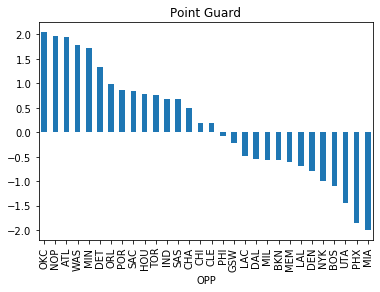

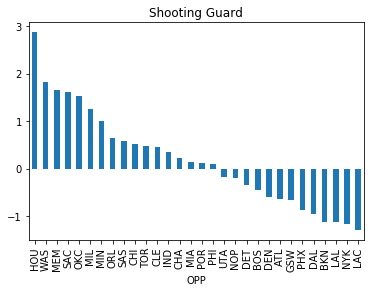

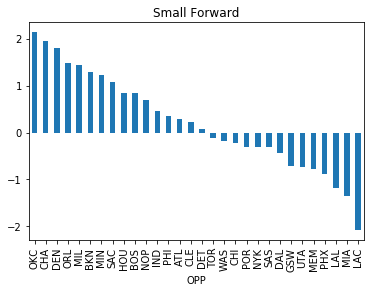

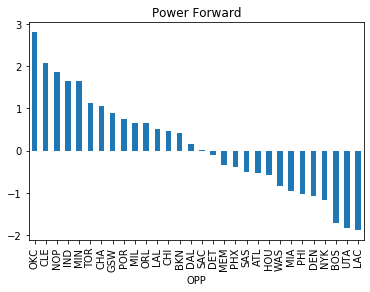

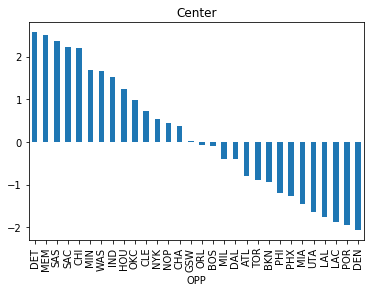

In [18]:
pg = data.where(data['POSITION']=='PG')
sg = data.where(data['POSITION']=='SG')
sf = data.where(data['POSITION']=='SF')
pf = data.where(data['POSITION']=='PF')
c = data.where(data['POSITION']=='C')
pg.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Point Guard')
plt.show()
sg.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Shooting Guard')
plt.show()
sf.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Small Forward')
plt.show()
pf.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Power Forward')
plt.show()
c.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Center')
plt.show()

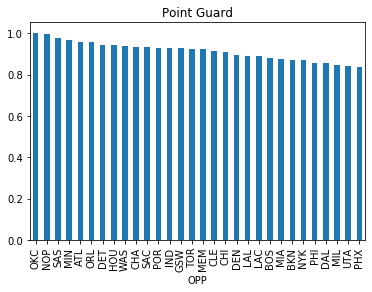

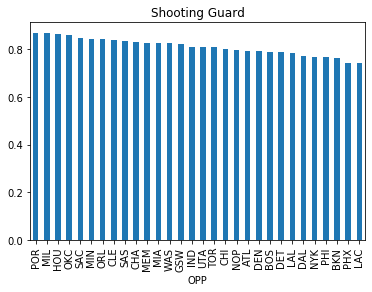

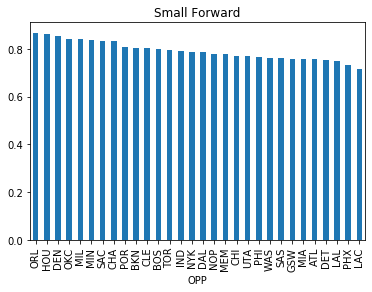

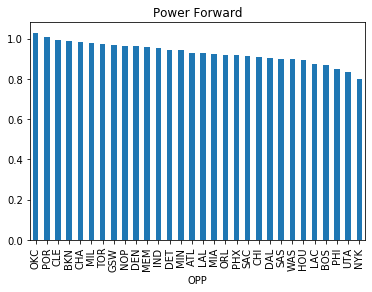

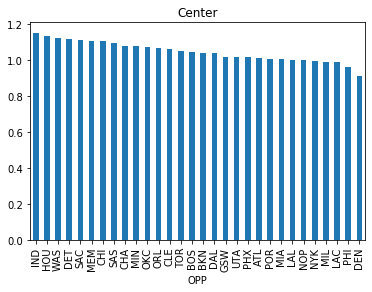

In [19]:
pg.groupby("OPP")['FPTS/MIN'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Point Guard')
plt.show()
sg.groupby("OPP")['FPTS/MIN'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Shooting Guard')
plt.show()
sf.groupby("OPP")['FPTS/MIN'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Small Forward')
plt.show()
pf.groupby("OPP")['FPTS/MIN'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Power Forward')
plt.show()
c.groupby("OPP")['FPTS/MIN'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Center')
plt.show()

In [20]:
df = pred
def pg_id(x):
    if x=='PG':
        return 1
    else:
        return 0
def sg_id(x):
    if x=='SG':
        return 1
    else:
        return 0
def sf_id(x):
    if x=='SF':
        return 1
    else:
        return 0
def pf_id(x):
    if x=='PF':
        return 1
    else:
        return 0
def c_id(x):
    if x=='C':
        return 1
    else:
        return 0
    
#One hot encoder for position
#label_encoder = LabelEncoder()
#df['NEW_POS'] = label_encoder.fit_transform(df['Position'])

df['PG'] = df['POSITION'].apply(pg_id)
df['SG'] = df['POSITION'].apply(sg_id)
df['SF'] = df['POSITION'].apply(sf_id)
df['PF'] = df['POSITION'].apply(pf_id)
df['C'] = df['POSITION'].apply(c_id)
df['COST'] = [float(i) for i in df['COST']]

#Clean data and convert to list- only look at rows with diet data and not constraint information
data = df.where(df['COST'] > 0)
data = data.dropna()
data = data.values.tolist()

players = [x[0] for x in data]
cost = dict([(x[0], float(x[12])) for x in data])
position = dict([(x[0], x[1]) for x in data])
proj_pts = dict([(x[0], float(x[11])) for x in data])

pg = dict([(x[0], float(x[13])) for x in data])
sg = dict([(x[0], float(x[14])) for x in data])
sf = dict([(x[0], float(x[15])) for x in data])
pf = dict([(x[0], float(x[16])) for x in data])
c = dict([(x[0], float(x[17])) for x in data])

player_vars = LpVariable.dicts("Player", players, cat = "Integer", lowBound= 0, upBound = 1)

# create the optimization problem framework - maximize points while meeting requirements of maximum cost
prob = LpProblem("NBA_Optimize", LpMaximize)

#Define objective function for projected points
obj_func = lpSum([proj_pts[i] * player_vars[i] for i in players])
prob += obj_func

#Number of player choices constraint
constraint_2 = lpSum([player_vars[i] for i in player_vars]) == 8
prob += constraint_2 
 
#Cost Constraint
constraint_3 = lpSum([cost[f] * player_vars[f] for f in player_vars]) <= 200.0
prob += constraint_3

#Position Constraints
#PG
prob += lpSum([pg[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([pg[f] * player_vars[f] for f in player_vars]) <= 3

#SG
prob += lpSum([sg[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([sg[f] * player_vars[f] for f in player_vars]) <= 3

#G
prob += lpSum([(pg[f] * player_vars[f]) + (sg[f] * player_vars[f]) for f in player_vars]) >= 3
prob += lpSum([(pg[f] * player_vars[f]) + (sg[f] * player_vars[f]) for f in player_vars]) <= 4

#SF
prob += lpSum([sf[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([sf[f] * player_vars[f] for f in player_vars]) <= 3

#PF
prob += lpSum([pf[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([pf[f] * player_vars[f] for f in player_vars]) <= 3

#F
prob += lpSum([(sf[f] * player_vars[f]) + (pf[f] * player_vars[f]) for f in player_vars]) >= 3
prob += lpSum([(sf[f] * player_vars[f]) + (pf[f] * player_vars[f]) for f in player_vars]) <= 4

#C
prob += lpSum([c[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([c[f] * player_vars[f] for f in player_vars]) <= 2

#Solve the Objective Function
prob.solve()
name_lst = []
import re
for x in prob.variables():
    if x.varValue>0:
        nm = x.name
        name_lst.append(re.sub('_',' ',nm[7:]))
lineup = pd.DataFrame(name_lst).rename(columns={0:'PLAYER'})
lineup = lineup.merge(pred, how = 'inner', left_on = 'PLAYER', right_on = 'PLAYER')
lineup = lineup[['PLAYER', 'POSITION', 'EMA2', 'FPTS', 'FPTS/MIN', 'COST', 'PRED']]
print('Optimal Lineup is: \n\n', lineup, '\n\n\nThe Projected Total Points are: ', sum(lineup['PRED']))

Optimal Lineup is: 

            PLAYER POSITION       EMA2       FPTS  FPTS/MIN  COST       PRED
0    Aaron Gordon       PF  27.370015  26.781250  0.933977  14.0  27.757142
1     Bruce Brown       SG  38.101685  20.542857  0.864892  11.0  28.018775
2  Damian Lillard       PG  51.641237  45.765152  1.279640  41.0  47.332786
3  Hamidou Diallo       SG  43.466559  23.154902  0.961454  12.0  31.424754
4    Jrue Holiday       SG  44.702911  36.866102  1.133078  34.0  40.519338
5   Kawhi Leonard       SF  35.235164  44.248077  1.300069  36.0  42.776103
6     Rudy Gobert        C  44.971556  40.468571  1.319630  33.0  44.485218
7  Thaddeus Young       PF  38.226505  28.878788  1.191189  18.0  33.270362 


The Projected Total Points are:  295.5844772063644
